<a href="https://colab.research.google.com/github/manojr1843/machine-learning/blob/master/diabetes_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
%matplotlib inline

In [ ]:
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
features = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
target = pd.DataFrame(diabetes.target, columns = ['Target'])
data = pd.concat([features, target], axis =1)

In [ ]:
data2 = data.corr('pearson')
data2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [ ]:
abs(data2.loc['Target']).sort_values(ascending=True)

sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s3        0.394789
s4        0.430453
bp        0.441484
s5        0.565883
bmi       0.586450
Target    1.000000
Name: Target, dtype: float64

In [ ]:
x = data['Target']
y = data['age']
x = np.array(x/x.mean())
y = np.array(y/y.mean())
n = int(0.7*len(x))
x_train = x[:n]
y_train = y[:n]
x_test = x[n:]
y_test = y[n:]

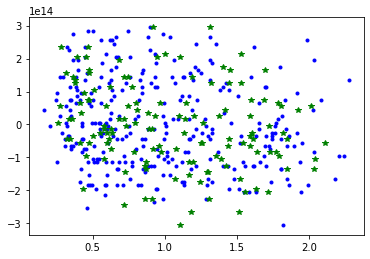

In [ ]:
plt.plot(x_train,y_train, 'b.')
plt.plot(x_test,y_test, 'g*')

In [ ]:
def hypothesis(a,b,x):
  return a*x + b

def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e+=np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/(2*m))*e

In [ ]:
def step_gradiet(a,b,x,y,learning_rate):
  c=0
  d=0
  m=len(x)
  for i in range(m):
    c += 1/m *(hypothesis(a,b,x[i])-y[i])*x[i]
    d += 1/m *(hypothesis(a,b,x[i])-y[i])
  a=a-(c * learning_rate)
  b=b-(d * learning_rate)
  return a,b

def descend(initial_a, initial_b, x,y, learning_rate, iterations):
  a=initial_a
  b=initial_b
  for i in range(iterations):
    e=error(a,b,x,y)
    if i%1000==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a = 1
b = 2
learning_rate = 0.1
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 8.863193045406033e+27, a: 1, b: 2
Error: 8.617204825040289e+27, a: -43294947563093.164, b: 44398235500293.1
Error: 8.617204825036793e+27, a: -43295105309336.6, b: 44398412475583.48
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375
Error: 8.617204825036804e+27, a: -43295105309939.95, b: 44398412476260.375


In [ ]:
print(error(a,b,x_train, y_train))
print(error(final_a, final_b,x_train,y_train))
print(error(final_a,final_b,x_test,y_test))

8.863193045406033e+27
8.617204825036804e+27


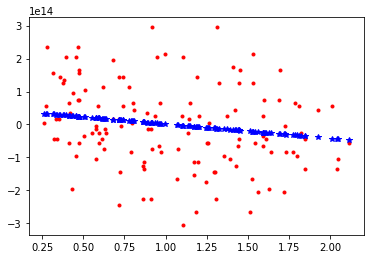

In [ ]:
plt.plot(x_test,y_test,'r.',x_test,hypothesis(final_a,final_b,x_test),'b*')